In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Local application imports
from xai_compare.comparison import Consistency 
from xai_compare.datasets import diabetes
from xai_compare.config import MODE

<h3>Consistency measurement demonstration</h3>

In [3]:
# Initialize and train a Random Forest classifier
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

# create the Consistency class with diabetes() dataset
consistency = Consistency(model, *diabetes(), mode=MODE.CLASSIFICATION) 

In [4]:
consistency.apply()

Processing folds: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


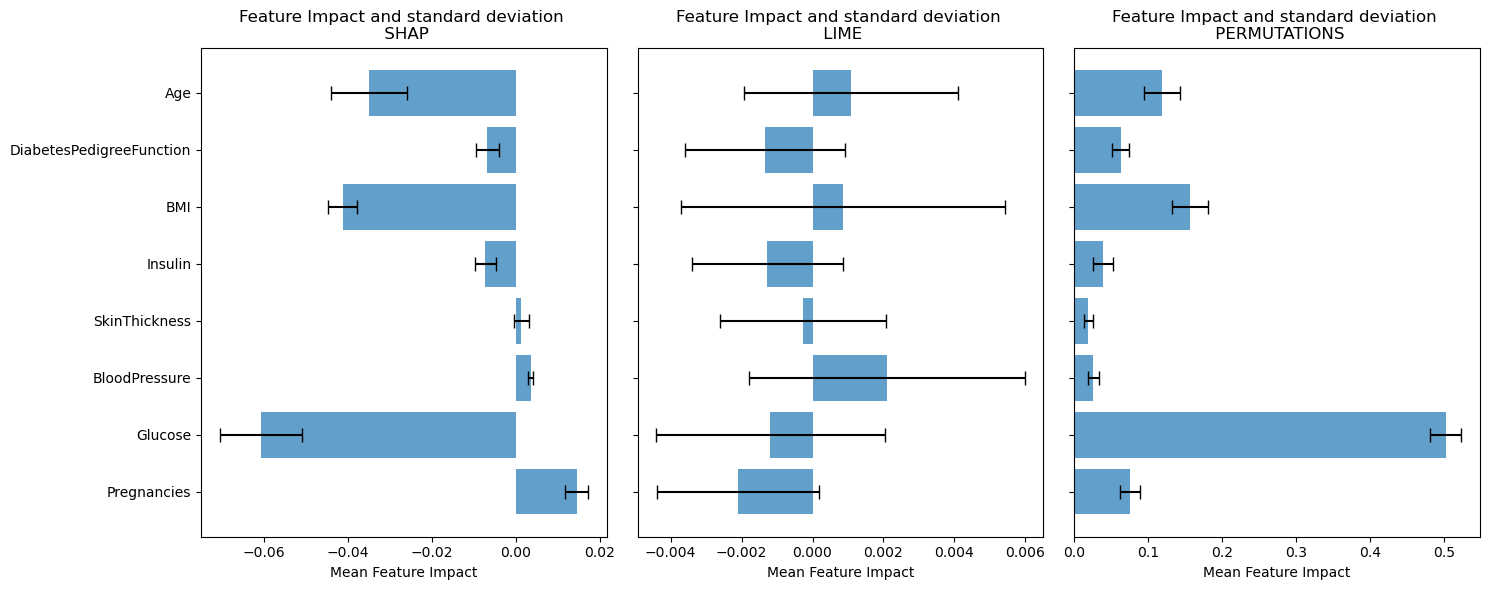

In [5]:
consistency.display()

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
consistency.reults

{'SHAP': array([[[ 0.01949389],
         [-0.04901452],
         [ 0.00350362],
         [-0.00147073],
         [-0.01000237],
         [-0.04165765],
         [-0.01119211],
         [-0.01972798]],
 
        [[ 0.01237929],
         [-0.05522535],
         [ 0.00468496],
         [ 0.00048244],
         [-0.00350266],
         [-0.04766124],
         [-0.0040333 ],
         [-0.03305789]],
 
        [[ 0.01151893],
         [-0.05462936],
         [ 0.00326231],
         [ 0.00404338],
         [-0.00560435],
         [-0.03976314],
         [-0.00891531],
         [-0.03377398]],
 
        [[ 0.01343637],
         [-0.07269421],
         [ 0.00310746],
         [ 0.00123146],
         [-0.01005696],
         [-0.03766994],
         [-0.00517607],
         [-0.04575634]],
 
        [[ 0.0153587 ],
         [-0.07232738],
         [ 0.00320917],
         [ 0.00225754],
         [-0.0071644 ],
         [-0.03936363],
         [-0.00475262],
         [-0.04283239]]]),
 'LIME': array([[

In [24]:
for res in consistency.reults['SHAP']:
    print(res.flatten())

[ 0.01949389 -0.04901452  0.00350362 -0.00147073 -0.01000237 -0.04165765
 -0.01119211 -0.01972798]
[ 0.01237929 -0.05522535  0.00468496  0.00048244 -0.00350266 -0.04766124
 -0.0040333  -0.03305789]
[ 0.01151893 -0.05462936  0.00326231  0.00404338 -0.00560435 -0.03976314
 -0.00891531 -0.03377398]
[ 0.01343637 -0.07269421  0.00310746  0.00123146 -0.01005696 -0.03766994
 -0.00517607 -0.04575634]
[ 0.0153587  -0.07232738  0.00320917  0.00225754 -0.0071644  -0.03936363
 -0.00475262 -0.04283239]


In [11]:
X, y = diabetes()

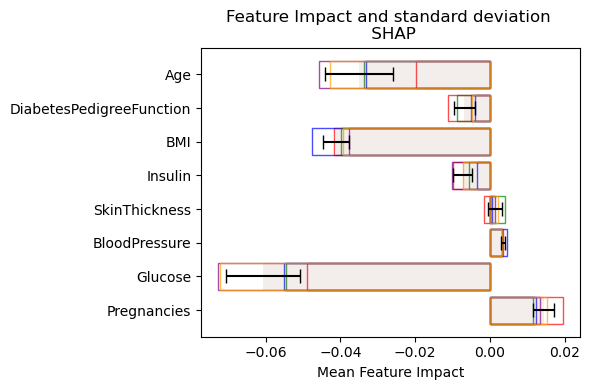

In [39]:

# fig, axes = plt.subplots(1, 1, figsize=(15, 6), sharey=True)
fig = plt.figure(figsize=(6, 4))

# Ensure axes is always iterable
# axes = np.atleast_1d(axes)

# Loop through each explainer and plot the feature impacts
# for ax, explainer in zip(axes, self.list_explainers):
mean_impact, std_impact = consistency.summary['SHAP']
# Define a list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange']


# for res in consistency.reults['SHAP']:
#     plt.barh(X.columns, res.flatten(), align='center', alpha=0.7, capsize=5, fill=False, edgecolor='r') #xerr=std_impact.flatten(), ecolor='black',


for i, res in enumerate(consistency.reults['SHAP']):
    color = colors[i % len(colors)]  # Cycle through colors list
    # plt.barh(X.columns, res.flatten(), align='center', alpha=0.7, capsize=5, fill=False, edgecolor=color)
    plt.barh(X.columns, res.flatten(), align='center', alpha=0.7, fill=False, capsize=5, edgecolor=color, linewidth=1) #fill=False,
    # plt.barh(X.columns, res.flatten()-res.flatten(), align='center', alpha=0.7, capsize=5, fill=False, edgecolor=color, linewidth=2)

plt.barh(X.columns, mean_impact.flatten(), xerr=std_impact.flatten(), align='center', alpha=0.1, ecolor='black', capsize=5)
plt.xlabel('Mean Feature Impact')
plt.title(f'Feature Impact and standard deviation \n SHAP')

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


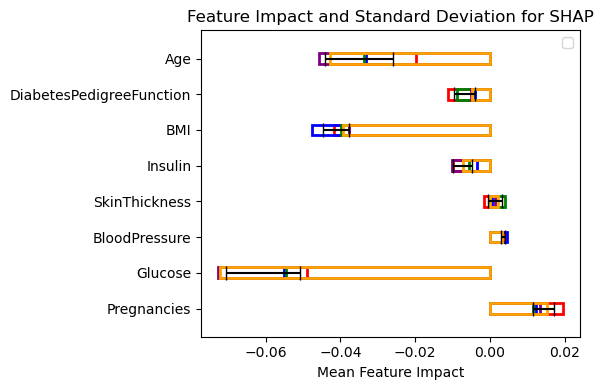

In [30]:
import matplotlib.pyplot as plt

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Data for plotting
mean_impact, std_impact = consistency.summary['SHAP']
colors = ['red', 'blue', 'green', 'purple', 'orange']  # Color list for different bars

# Plot each result with different edge colors
for i, res in enumerate(consistency.reults['SHAP']):
    color = colors[i % len(colors)]  # Cycle through colors list
    ax.barh(X.columns, res.flatten(), height=0.3, align='center', color='none', edgecolor=color, linewidth=2)

# Overlay the mean impact with error bars
# ax.errorbar(mean_impact.flatten(), X.columns, xerr=std_impact.flatten(), fmt='o', color='black', label='Mean with std dev') #fmt='o',
plt.barh(X.columns, mean_impact.flatten(), xerr=std_impact.flatten(), align='center', alpha=0.0, ecolor='black', capsize=5)

# Set labels and title
ax.set_xlabel('Mean Feature Impact')
ax.set_title('Feature Impact and Standard Deviation for SHAP')

# Optional: Add a legend if you want to explain the error bars
ax.legend()

plt.tight_layout()
plt.show()

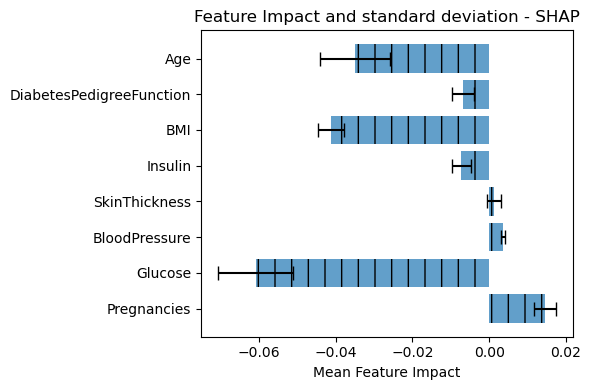

In [45]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)  # Create a subplot

# Assuming 'consistency.summary' and 'X.columns' are defined properly
mean_impact, std_impact = consistency.summary['SHAP']

# Ensure that mean_impact and std_impact are flattened if they are numpy arrays
ax.barh(X.columns, mean_impact.flatten(), xerr=std_impact.flatten(), align='center', alpha=0.7, ecolor='black', capsize=5, hatch='|')

ax.set_xlabel('Mean Feature Impact')  # Set the x-axis label
ax.set_title('Feature Impact and standard deviation - SHAP')  # Set the title

plt.tight_layout()
plt.show()

In [47]:
mean_impact, std_impact

(array([[ 0.01443743],
        [-0.06077817],
        [ 0.0035535 ],
        [ 0.00130882],
        [-0.00726615],
        [-0.04122312],
        [-0.00681388],
        [-0.03502971]]),
 array([[0.00283451],
        [0.00982244],
        [0.00058052],
        [0.00183263],
        [0.00253816],
        [0.00345984],
        [0.00276578],
        [0.00911647]]))

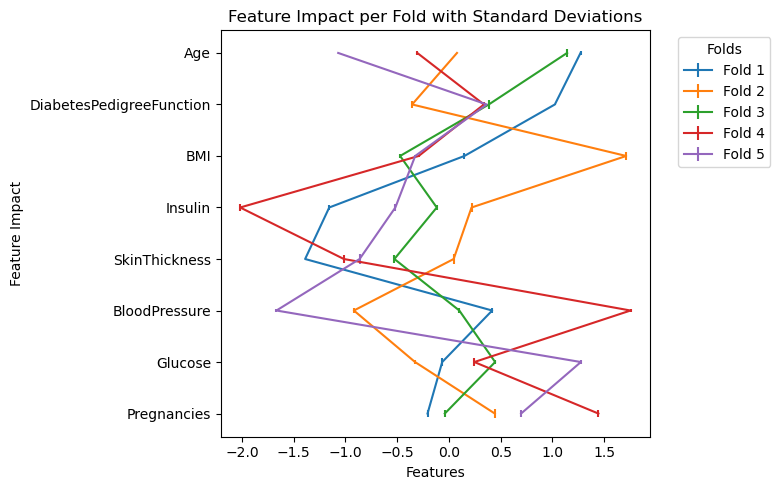

In [44]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))

# Sample data simulation
num_folds = 5
num_features = len(X.columns)
# data = np.random.randn(num_folds, num_features)  # Random data simulating feature impacts per fold
# std_devs = np.random.rand(num_folds, num_features) * 0.1  # Random small standard deviations

# Plot each fold's data
for i in range(num_folds):
    ax.errorbar(data[i], range(num_features), yerr=std_devs[i], label=f'Fold {i+1}') #fmt='o',

# ax.set_xticks(range(num_features))
# ax.set_xticklabels(X.columns, rotation=45)
ax.set_xlabel('Features')
ax.set_ylabel('Feature Impact')
ax.set_title('Feature Impact per Fold with Standard Deviations')
ax.legend(title='Folds', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_yticks(range(num_features))
ax.set_yticklabels(X.columns)

plt.tight_layout()
plt.show()

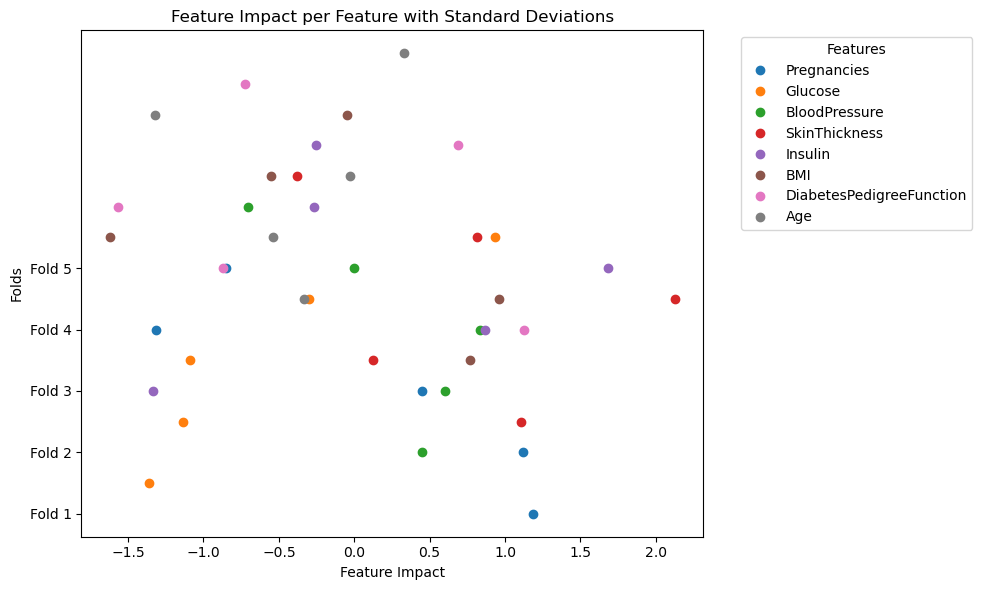

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Sample data simulation
num_folds = 5
num_features = len(X.columns)
data = np.random.randn(num_folds, num_features)  # Random data simulating feature impacts per fold
std_devs = np.random.rand(num_folds, num_features) * 0.1  # Random small standard deviations

# Plot each fold's data
for i in range(num_features):
    ax.errorbar(data[:, i], np.arange(num_folds) + i*(0.1*num_folds), fmt='o', label=X.columns[i]) #xerr=std_devs[:, i],

ax.set_yticks(np.arange(num_folds))
ax.set_yticklabels([f'Fold {i+1}' for i in range(num_folds)])
ax.set_ylabel('Folds')
ax.set_xlabel('Feature Impact')
ax.set_title('Feature Impact per Feature with Standard Deviations')
ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [9]:
consistency.summary['SHAP']

(array([[ 0.01443743],
        [-0.06077817],
        [ 0.0035535 ],
        [ 0.00130882],
        [-0.00726615],
        [-0.04122312],
        [-0.00681388],
        [-0.03502971]]),
 array([[0.00283451],
        [0.00982244],
        [0.00058052],
        [0.00183263],
        [0.00253816],
        [0.00345984],
        [0.00276578],
        [0.00911647]]))